In [1]:
%pylab inline
import h5py
from matplotlib.colors import LogNorm


Populating the interactive namespace from numpy and matplotlib


In [2]:
f = h5py.File("../data/v_gonzalez/sfr.z6.hdf5", 'r')
def printname(name):
     print name
f.visit(printname)

Info
Info/IMF
Info/Model
Info/Volume
Info/h
Info/redshift
z6
z6/DHaloID
z6/FUV
z6/NUV
z6/logM
z6/logSFR
z6/logSM
z6/type


In [3]:
group1 = f['Info']
IMF    = group1['IMF'].value
Model  = group1['Model'].value

print "IMF = ", IMF, "\nModel = ", Model

group = f['z6']
logM   = group['logM'].value
logSFR = group['logSFR'].value
Type   = group['type'].value
HaloId = group['DHaloID'].value

IMF =  Kennicutt 
Model =  V. Gonzalez-Perez et al. 2014 (http://arxiv.org/abs/1309.7057)


#Galaxy Classification:

| Type | Galaxy    |           Def               |
|:----:|-----------|-----------------------------|
| 0    | Central   | Main galaxy in the halo     |
| 1    | Satellite | Galaxy in a subhalo         |
| 2    | Orphan    | Galaxy without halo/subhalo |

In [4]:
index = where(Type!=2)[0]


LogSFR = logSFR[index]
LogM   = logM[index]




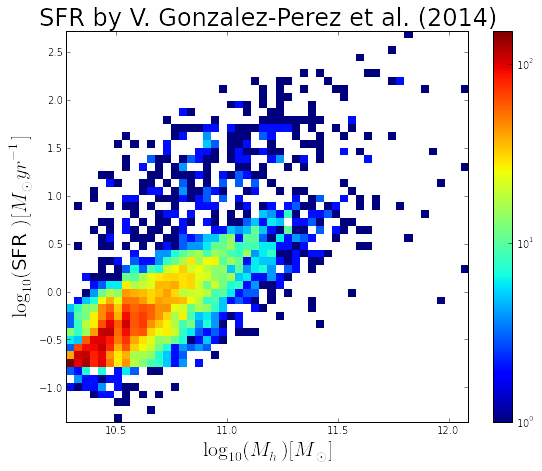

In [7]:
figure(figsize=(9,7))
title('SFR by V. Gonzalez-Perez et al. (2014)', fontsize=24)
hist2d(LogM, LogSFR, bins=50, norm=LogNorm()); colorbar()
xlabel(r"$\log_{10}( M_h ) [M_\odot]$", fontsize=20)
ylabel(r"$\log_{10}($SFR $)[M_\odot yr^{-1}]$", fontsize=20)
savefig("v_gonzalez-perez_raw_SFR.pdf")

In [17]:
MassRange = linspace(10.30,12.10,13)

In [18]:
SFR = []
MassRg = []
for i in range(MassRange.size-1):
    SFRaux = 10**LogSFR[where((LogM>MassRange[i])&(LogM<=MassRange[i+1]))]
    SFR.append(log10([SFRaux.mean(), percentile(SFRaux,25),percentile(SFRaux,50),percentile(SFRaux,75)]))
    MassRg.append((MassRange[i] + MassRange[i+1])/2)
SFR = array(SFR)
MassRg = array(MassRg)


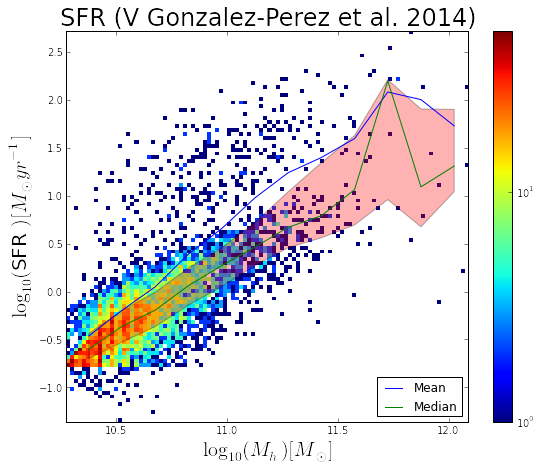

In [19]:
figure(figsize=(9,7))
title('SFR (V Gonzalez-Perez et al. 2014)', fontsize=24)


hist2d(LogM, LogSFR, bins=100, norm=LogNorm()); colorbar()

plot(MassRg,SFR[:,0], label='Mean')
plot(MassRg,SFR[:,2], label='Median')
fill_between(MassRg,SFR[:,1],SFR[:,3], facecolor="red",alpha=0.3, label='Region of interest')

#axhspan(-4.8,-1.0, facecolor='k', alpha=0.6, label='Ignored Region')

legend(loc='lower right')

xlabel(r"$\log_{10}( M_h ) [M_\odot]$", fontsize=20)
ylabel(r"$\log_{10}($SFR $)[M_\odot yr^{-1}]$", fontsize=20)
savefig("v_gonzalez-perez_sel_SFR.pdf")

In [61]:
logM.max()

12.086736679077148

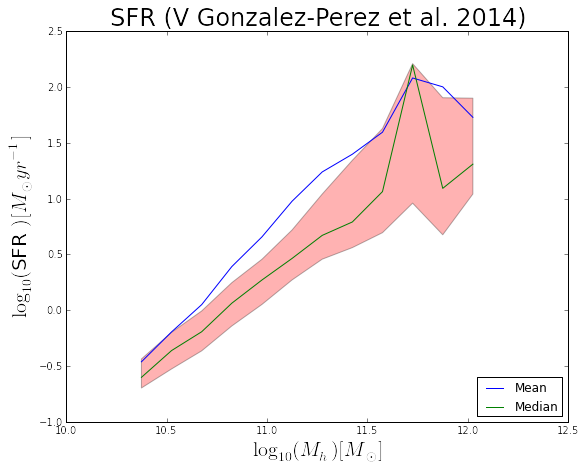

In [21]:
figure(figsize=(9,7))
title('SFR (V Gonzalez-Perez et al. 2014)', fontsize=24)


#hist2d(logM, logSFR, bins=100, norm=LogNorm()); colorbar()

plot(MassRg,SFR[:,0], label='Mean')
plot(MassRg,SFR[:,2], label='Median')
fill_between(MassRg,SFR[:,1],SFR[:,3], facecolor="red",alpha=0.3, label='Region of interest')

#axhspan(-5,-1.0, facecolor='k', alpha=0.6, label='Ignored Region')

legend(loc='lower right')

xlabel(r"$\log_{10}( M_h ) [M_\odot]$", fontsize=20)
ylabel(r"$\log_{10}($SFR $)[M_\odot yr^{-1}]$", fontsize=20)
#savefig("v_gonzalez-perez_sel_SFR.pdf")

In [22]:
data  = open( 'analysis/gonzalez_data.dat', 'w')

data.write('# Halo Mass SFR_mean SFR_per25 SFR_per50 SFR_per75\n')
for i in range(MassRg.size):
    data.write(str(MassRg[i])+'\t'+str(SFR[i,0])+'\t'+str(SFR[i,1])+'\t'+str(SFR[i,2])+'\t'+str(SFR[i,3])+'\n')
data.close()


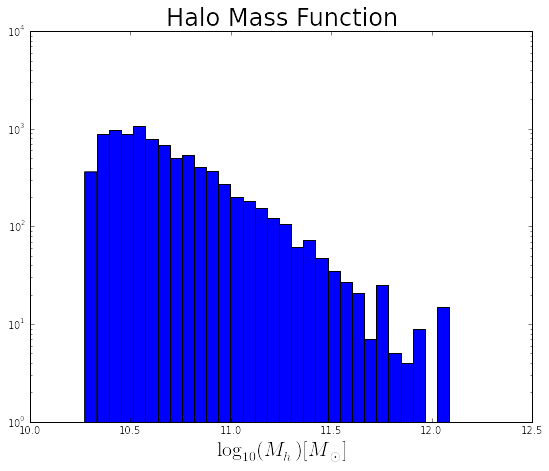

In [23]:
figure(figsize=(9,7))
hist(logM, bins=30, log='true')
title('Halo Mass Function', fontsize=24)
xlabel(r"$\log_{10}( M_h ) [M_\odot]$", fontsize=20)